In [2]:
df = read.csv('E:/data/data science/data course/DATASET/seatdata.csv')

In [3]:
head(df)

,Stature,Sitting.Height,SHS,BMI,L11,H17,Weight,SeatX
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1740,931,0.5350575,18.39741,-55,685,55.7,320.0082
2,1877,870,0.4635056,22.59355,95,685,79.6,620.3178
3,1764,962,0.5453515,22.88141,20,635,71.2,606.8582
4,1686,906,0.5373665,29.44492,-55,685,83.7,660.9378
5,1786,933,0.5223964,22.76008,95,685,72.6,615.8362
6,1692,879,0.5195035,29.20153,20,635,83.6,844.2308


In [4]:
dim(df)

[1] 399   8

In [5]:
str(df)

'data.frame':	399 obs. of  8 variables:
 $ Stature       : int  1740 1877 1764 1686 1786 1692 1936 1703 1683 1647 ...
 $ Sitting.Height: int  931 870 962 906 933 879 821 853 916 897 ...
 $ SHS           : num  0.535 0.464 0.545 0.537 0.522 ...
 $ BMI           : num  18.4 22.6 22.9 29.4 22.8 ...
 $ L11           : int  -55 95 20 -55 95 20 95 20 -55 95 ...
 $ H17           : int  685 685 635 685 685 635 685 635 585 685 ...
 $ Weight        : num  55.7 79.6 71.2 83.7 72.6 83.6 72.2 87.7 81.5 78.5 ...
 $ SeatX         : num  320 620 607 661 616 ...


In [6]:
summary(df)

    Stature     Sitting.Height        SHS              BMI       
 Min.   :1513   Min.   : 792.0   Min.   :0.4241   Min.   :11.67  
 1st Qu.:1683   1st Qu.: 870.0   1st Qu.:0.5003   1st Qu.:22.83  
 Median :1733   Median : 904.0   Median :0.5204   Median :26.18  
 Mean   :1734   Mean   : 902.5   Mean   :0.5214   Mean   :26.16  
 3rd Qu.:1782   3rd Qu.: 933.0   3rd Qu.:0.5434   3rd Qu.:29.32  
 Max.   :1954   Max.   :1019.0   Max.   :0.6266   Max.   :41.91  
      L11              H17            Weight           SeatX       
 Min.   :-55.00   Min.   :585.0   Min.   : 34.20   Min.   : 236.1  
 1st Qu.:-55.00   1st Qu.:585.0   1st Qu.: 69.60   1st Qu.: 618.1  
 Median : 20.00   Median :635.0   Median : 78.50   Median : 728.9  
 Mean   : 19.44   Mean   :635.6   Mean   : 78.30   Mean   : 734.2  
 3rd Qu.: 95.00   3rd Qu.:685.0   3rd Qu.: 87.75   3rd Qu.: 845.3  
 Max.   : 95.00   Max.   :685.0   Max.   :114.70   Max.   :1263.9  

In [7]:
data.frame('Features'=c(colnames(df)), 'missing values counte'=sapply(df, function(x) sum(is.na(x))),row.names=NULL)

Features,missing.values.counte
<fct>,<int>
Stature,0
Sitting.Height,0
SHS,0
BMI,0
L11,0
H17,0
Weight,0
SeatX,0


### Fit a full model

In [3]:
fullmodel<- lm(SeatX~Stature+Sitting.Height+SHS+BMI+Weight+L11+H17, data=df)

In [9]:
summary(fullmodel)


Call:
lm(formula = SeatX ~ Stature + Sitting.Height + SHS + BMI + Weight + 
    L11 + H17, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.066 -28.197  -2.127  30.088 171.633 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     156.89279  593.21867   0.264    0.792    
Stature           0.68581    0.34108   2.011    0.045 *  
Sitting.Height   -0.71338    0.68193  -1.046    0.296    
SHS             367.19218 1176.55698   0.312    0.755    
BMI              30.46917    5.34567   5.700 2.37e-08 ***
Weight           -0.08173    1.79912  -0.045    0.964    
L11               0.53616    0.03312  16.189  < 2e-16 ***
H17              -1.51162    0.04981 -30.349  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.33 on 391 degrees of freedom
Multiple R-squared:  0.9372,	Adjusted R-squared:  0.9361 
F-statistic: 833.7 on 7 and 391 DF,  p-value: < 2.2e-16


### Fit a reduced model

In [10]:
reducemodel = lm(SeatX~1, data=df)

In [11]:
summary(reducemodel)


Call:
lm(formula = SeatX ~ 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-498.05 -116.13   -5.26  111.12  529.74 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  734.189      8.183   89.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 163.5 on 398 degrees of freedom


### Compare the models

In [12]:
 anova(reducemodel, fullmodel)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,398,10634166.2,NA,NA,NA,NA
2,391,667750.9,7,9966415,833.6873,1.372562e-230


### Indivitual parameter tests

#### calculat the p_value directly

In [16]:
2*(1-pt(summary(fullmodel)$coef[2, 1]/summary(fullmodel)$coef[2, 2], 399-8))

[1] 0.04504319

#### multicolinearty

In [49]:
library(faraway)

In [53]:
fullmodel <- lm(SeatX~Stature+Sitting.Height+SHS+BMI+Weight+L11+H17, data=df)

In [55]:
summary(fullmodel)


Call:
lm(formula = SeatX ~ Stature + Sitting.Height + SHS + BMI + Weight + 
    L11 + H17, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.066 -28.197  -2.127  30.088 171.633 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     156.89279  593.21867   0.264    0.792    
Stature           0.68581    0.34108   2.011    0.045 *  
Sitting.Height   -0.71338    0.68193  -1.046    0.296    
SHS             367.19218 1176.55698   0.312    0.755    
BMI              30.46917    5.34567   5.700 2.37e-08 ***
Weight           -0.08173    1.79912  -0.045    0.964    
L11               0.53616    0.03312  16.189  < 2e-16 ***
H17              -1.51162    0.04981 -30.349  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.33 on 391 degrees of freedom
Multiple R-squared:  0.9372,	Adjusted R-squared:  0.9361 
F-statistic: 833.7 on 7 and 391 DF,  p-value: < 2.2e-16


In [54]:
vif(fullmodel)

Stature Sitting.Height            SHS            BMI         Weight 
    155.107274     214.318355     379.445595     161.060941     133.045460 
           L11            H17 
      1.007828       1.013022

#### remove SHS or sitting.Height

In [4]:
mf <- lm(SeatX~Stature+SHS+BMI+Weight+L11+H17, data=df)

In [58]:
summary(mf)


Call:
lm(formula = SeatX ~ Stature + SHS + BMI + Weight + L11 + H17, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.945 -28.411  -1.872  30.252 170.897 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  698.72478  289.25110   2.416   0.0162 *  
Stature        0.37057    0.15981   2.319   0.0209 *  
SHS         -860.71269   81.06422 -10.618  < 2e-16 ***
BMI           32.18758    5.08764   6.327 6.85e-10 ***
Weight        -0.65812    1.71288  -0.384   0.7010    
L11            0.53661    0.03312  16.202  < 2e-16 ***
H17           -1.50941    0.04977 -30.328  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.33 on 392 degrees of freedom
Multiple R-squared:  0.937,	Adjusted R-squared:  0.9361 
F-statistic: 972.2 on 6 and 392 DF,  p-value: < 2.2e-16


In [57]:
vif(mf)

Stature        SHS        BMI     Weight        L11        H17 
 34.041594   1.800849 145.853089 120.567552   1.007657   1.011191

#### remove BMI or Weight


In [60]:
mf1 <- lm(SeatX~Stature+SHS+BMI+L11+H17, data=df)

In [61]:
summary(mf1)


Call:
lm(formula = SeatX ~ Stature + SHS + BMI + L11 + H17, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.598 -28.081  -2.251  29.928 170.312 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  802.48280  103.51358   7.752 7.80e-14 ***
Stature        0.31097    0.03836   8.107 6.68e-15 ***
SHS         -862.06556   80.89983 -10.656  < 2e-16 ***
BMI           30.24101    0.46472  65.073  < 2e-16 ***
L11            0.53685    0.03308  16.230  < 2e-16 ***
H17           -1.50987    0.04970 -30.379  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.29 on 393 degrees of freedom
Multiple R-squared:  0.937,	Adjusted R-squared:  0.9362 
F-statistic:  1169 on 5 and 393 DF,  p-value: < 2.2e-16


In [63]:
vif(mf1)

Stature      SHS      BMI      L11      H17 
1.965776 1.797452 1.219590 1.007295 1.010590

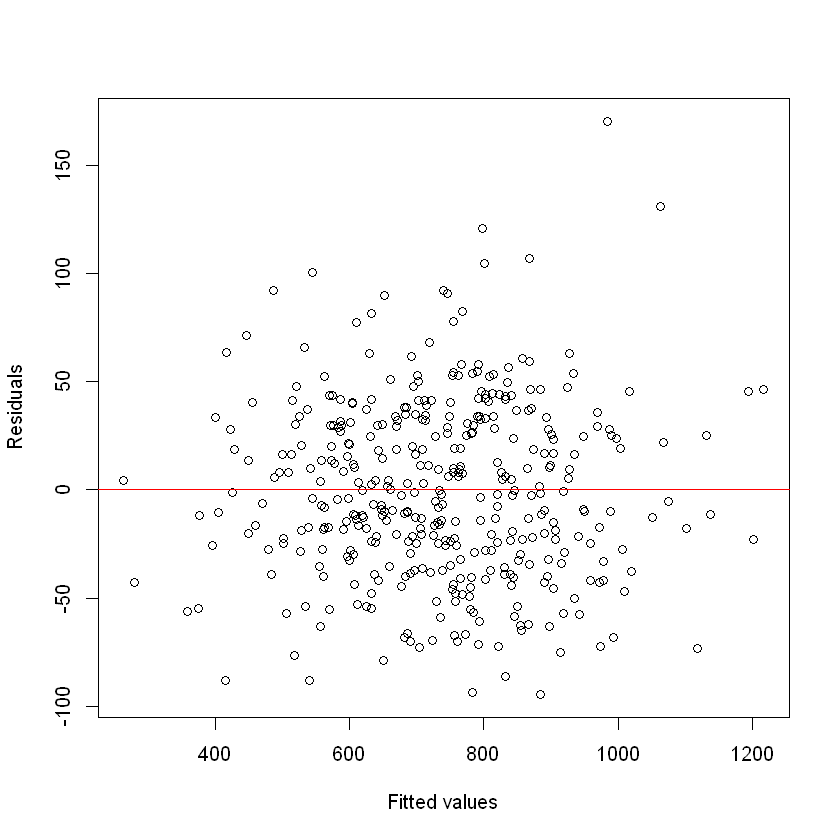

In [93]:
plot(mf1$fitted.values, mf1$residuals, xlab='Fitted values', ylab='Residuals')
abline(h=mean(mf1$residuals), col='red')

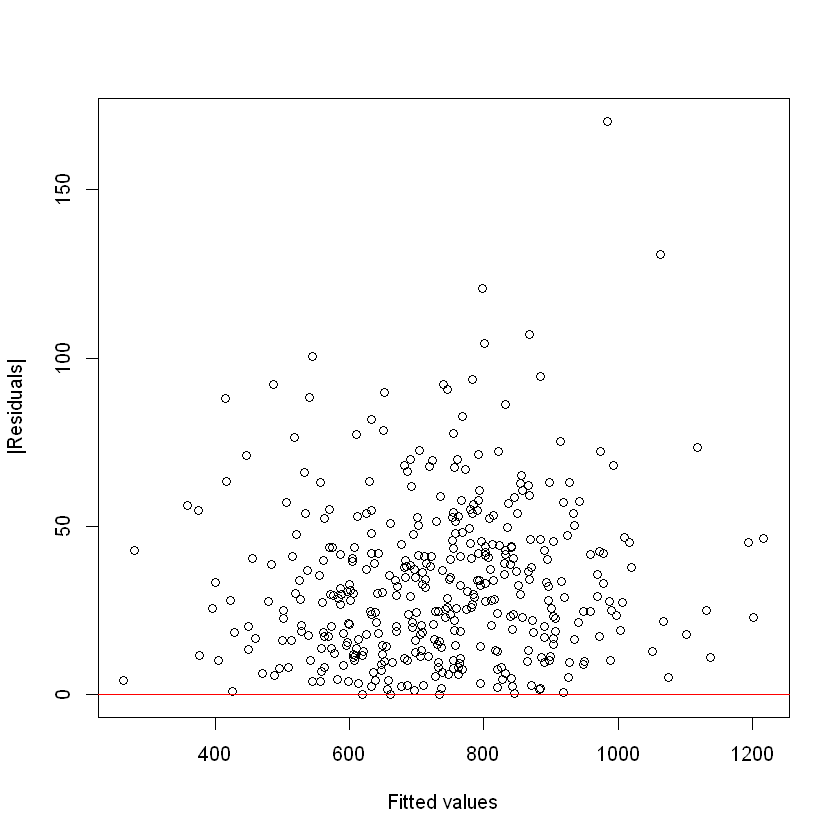

In [95]:
plot(mf1$fitted.values, abs(mf1$residuals), xlab='Fitted values', ylab='|Residuals|')
abline(h=mean(mf1$residuals), col='red')

In [96]:
summary(lm(abs(mf1$residual) ~ mf1$fitted ))


Call:
lm(formula = abs(mf1$residual) ~ mf1$fitted)

Residuals:
   Min     1Q Median     3Q    Max 
-35.26 -17.93  -2.86  11.01 133.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.78767    5.66983   4.019 6.99e-05 ***
mf1$fitted   0.01431    0.00755   1.896   0.0587 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.83 on 397 degrees of freedom
Multiple R-squared:  0.008973,	Adjusted R-squared:  0.006477 
F-statistic: 3.595 on 1 and 397 DF,  p-value: 0.05869


In [72]:
library(nortest)

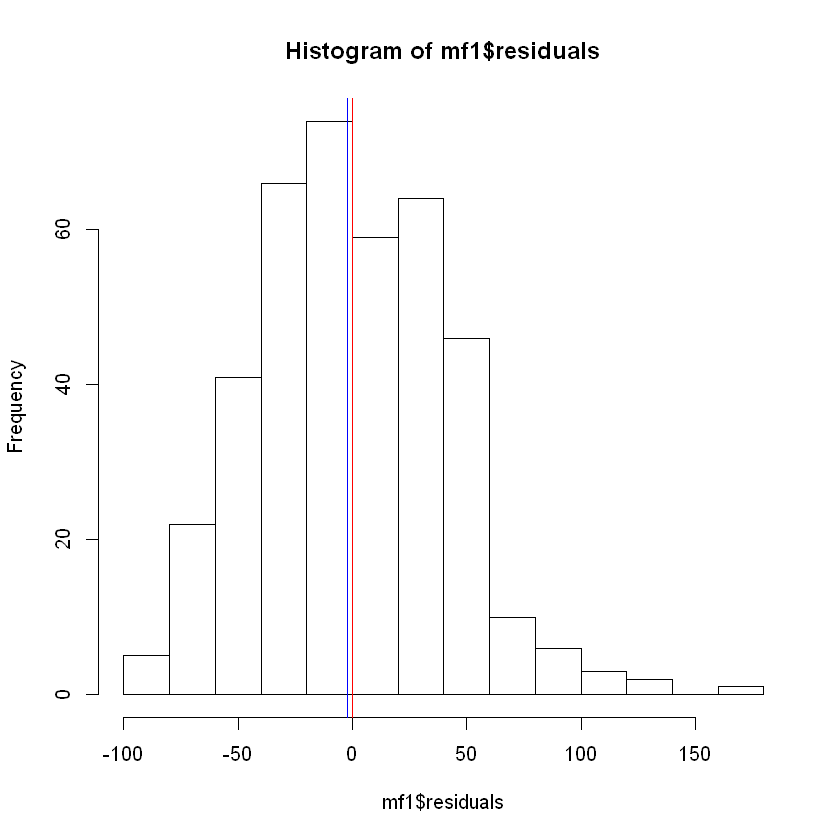

In [97]:
hist(mf1$residuals)
abline(v=mean(mf1$residuals), col='red')
abline(v=median(mf1$residuals), col='blue')

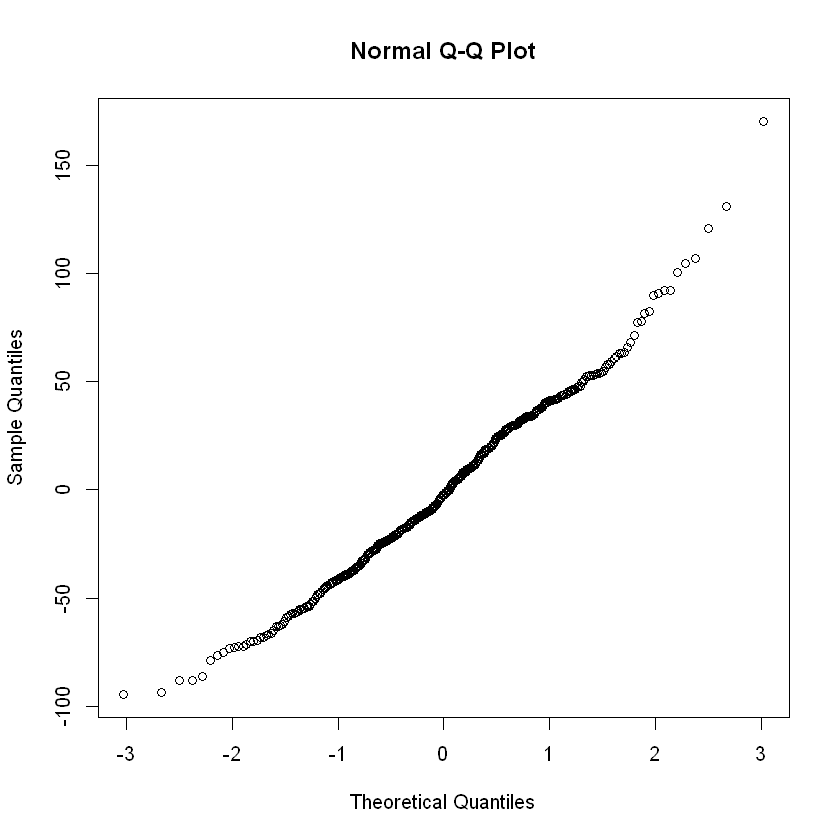

In [98]:
qqnorm(mf1$residuals)

#### Checking Normality _ Anderson-Darling test

In [99]:
ad.test(mf1$residual)


	Anderson-Darling normality test

data:  mf1$residual
A = 0.75452, p-value = 0.04922


In [100]:
acf(m1f$residuals)

ERROR: Error in as.ts(x): object 'm1f' not found


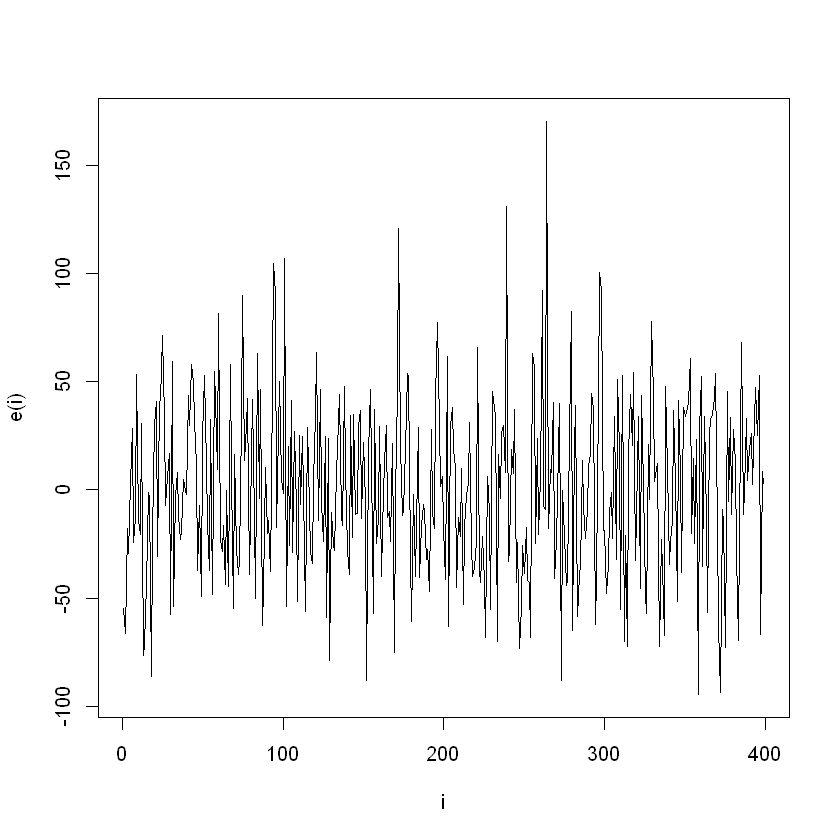

In [81]:
plot(mf$residuals[1:399], xlab='i', ylab='e(i)', type='l')


In [101]:
m = influence(mf1)

In [102]:
names(m)

[1] "hat"          "coefficients" "sigma"        "wt.res"

In [103]:
h = influence(mf1)$hat

In [104]:
length(influence(mf1)$hat)

[1] 399

In [105]:
summary(mf1)


Call:
lm(formula = SeatX ~ Stature + SHS + BMI + L11 + H17, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.598 -28.081  -2.251  29.928 170.312 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  802.48280  103.51358   7.752 7.80e-14 ***
Stature        0.31097    0.03836   8.107 6.68e-15 ***
SHS         -862.06556   80.89983 -10.656  < 2e-16 ***
BMI           30.24101    0.46472  65.073  < 2e-16 ***
L11            0.53685    0.03308  16.230  < 2e-16 ***
H17           -1.50987    0.04970 -30.379  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.29 on 393 degrees of freedom
Multiple R-squared:  0.937,	Adjusted R-squared:  0.9362 
F-statistic:  1169 on 5 and 393 DF,  p-value: < 2.2e-16


In [91]:
which(h>(3*6)/399)

239 320 
239 320

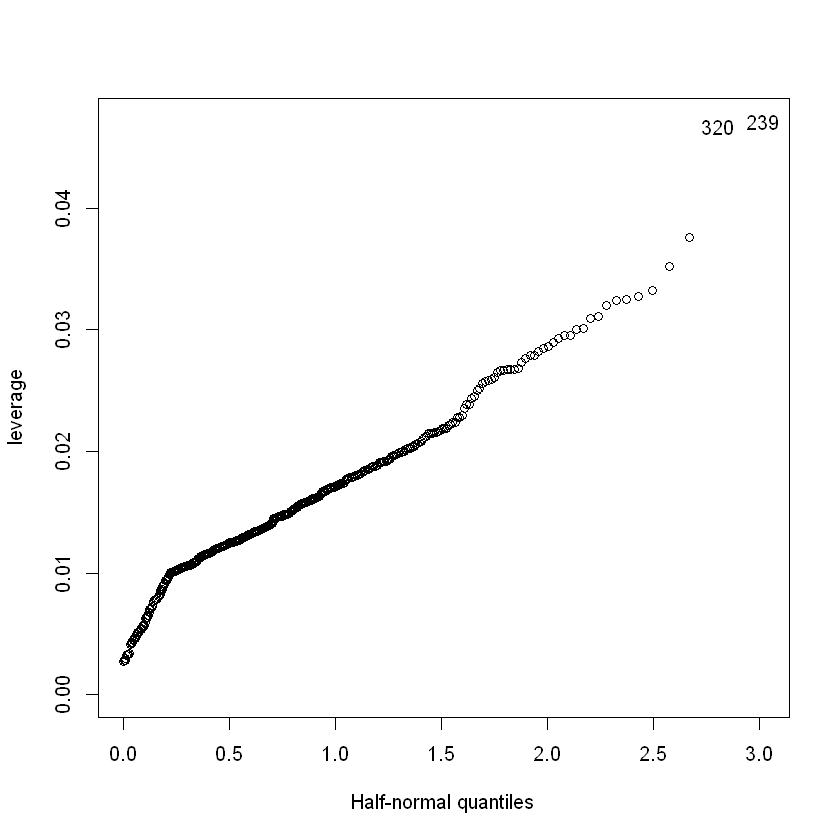

In [92]:
halfnorm(h, nlab=2, ylab='leverage')

In [106]:
df[320,]

,Stature,Sitting.Height,SHS,BMI,L11,H17,Weight,SeatX
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
320,1513,948,0.6265697,23.37093,-55,685,53.5,364.0866


In [108]:
df[239,]

,Stature,Sitting.Height,SHS,BMI,L11,H17,Weight,SeatX
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
239,1626,999,0.6143911,41.90817,95,685,110.8,1193.29


In [113]:
colMeans(df)

Stature Sitting.Height            SHS            BMI            L11 
  1734.2781955    902.4987469      0.5213742     26.1609997     19.4360902 
           H17         Weight          SeatX 
   635.6265664     78.2959900    734.1886880

In [114]:
var(df)

,Stature,Sitting.Height,SHS,BMI,L11,H17,Weight,SeatX
Stature,5721.100805,-2.616485,-1.713388405,-155.96431610,-109.8929799,1.503278e+02,5.343705e+01,-1.746343e+03
Sitting.Height,-2.616485,1977.607410,1.142930142,9.21162928,-168.3738240,1.462948e+02,3.070577e+01,-1.026164e+03
SHS,-1.713388,1.142930,0.001176192,0.05223541,-0.0624847,4.249624e-02,1.801971e-03,-6.482525e-02
BMI,-155.964316,9.211629,0.052235415,24.18473875,15.2646920,-7.884485e+00,5.750481e+01,6.579398e+02
L11,-109.892980,-168.373824,-0.062484702,15.26469200,3942.8344731,6.630899e+01,3.367236e+01,2.497913e+03
H17,150.327767,146.294757,0.042496236,-7.88448451,66.3089886,1.752119e+03,-8.402004e+00,-2.838199e+03
Weight,53.437048,30.705774,0.001801971,57.50480556,33.6723561,-8.402004e+00,1.763745e+02,1.783868e+03
SeatX,-1746.343301,-1026.164043,-0.064825249,657.93979500,2497.9133684,-2.838199e+03,1.783868e+03,2.671901e+04


In [115]:
diag(var(df))

Stature Sitting.Height            SHS            BMI            L11 
  5.721101e+03   1.977607e+03   1.176192e-03   2.418474e+01   3.942834e+03 
           H17         Weight          SeatX 
  1.752119e+03   1.763745e+02   2.671901e+04

In [117]:
sqrt(diag(var(df)))

Stature Sitting.Height            SHS            BMI            L11 
   75.63795876    44.47029807     0.03429566     4.91779816    62.79199370 
           H17         Weight          SeatX 
   41.85832045    13.28060641   163.45950708

In [119]:
resi <- residuals(mf1) 

In [121]:
sigma <- summary(mf1)$sigma

In [122]:
hi <- influence(mf1)$hat

In [123]:
stud.resi <- resi/(sigma*sqrt(1-hi))

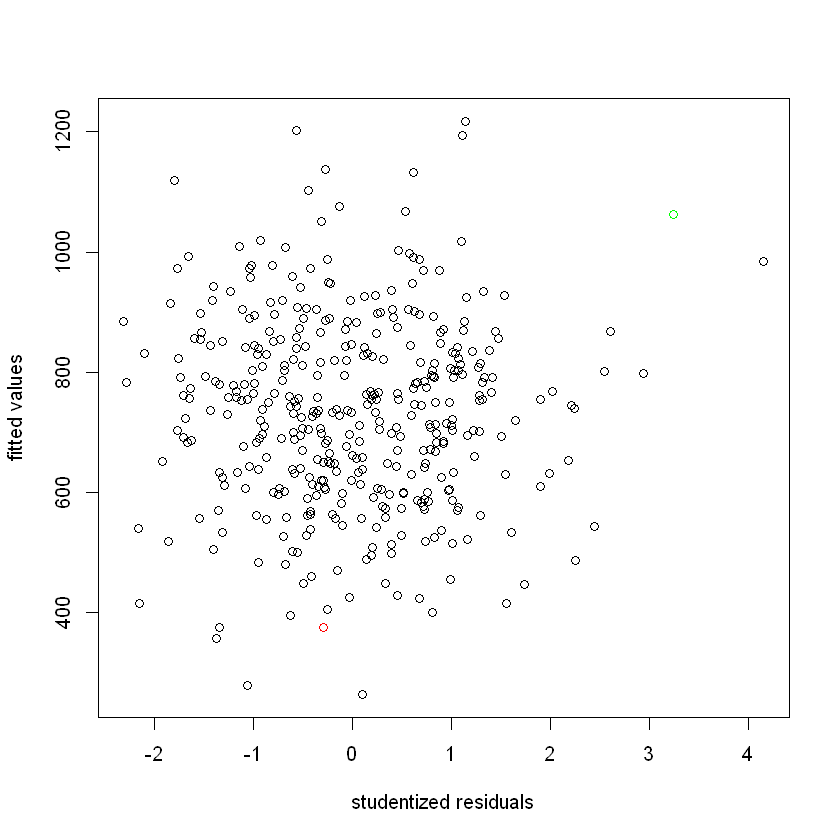

In [133]:
plot(stud.resi, fitted.values(mf1), ylab='fitted values', xlab= 'studentized residuals')
points(stud.resi[320], fitted.values(mf1)[320], col='red')
points(stud.resi[239], fitted.values(mf1)[239], col='green')

In [134]:
which(stud.resi>4)

264 
264

In [5]:
 ti <- rstudent(mf)

In [7]:
length(ti)

[1] 399

In [8]:
max(ti)

[1] 4.262841

In [9]:
which.max(ti)

264 
264

In [10]:
2*(1-pt(max(abs(ti)), df=399-6-1))

[1] 2.531591e-05

In [11]:
0.5/399

[1] 0.001253133

In [14]:
2*(1-pt(abs(ti[250]), df= 399-6-1))

250 
0.3524593

In [15]:
2*(1-pt(abs(ti[239]), df= 399-6-1))

239 
0.001188578

### Cook Distance

In [20]:
library(faraway)

In [17]:
 cook <- cooks.distance(mf)

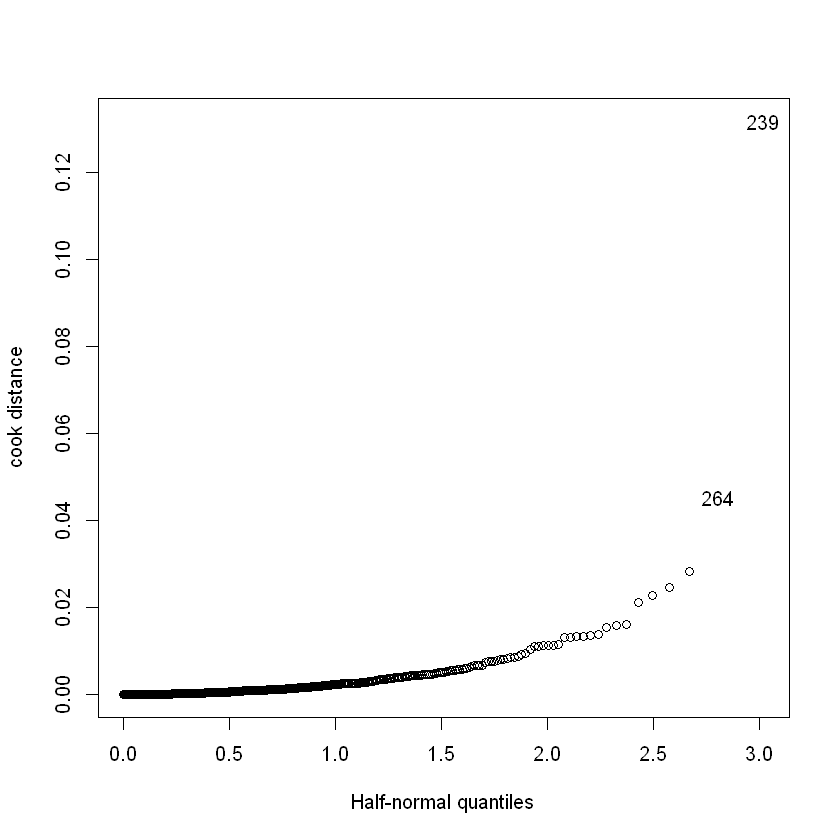

In [21]:
halfnorm(cook, nlab=2, ylab='cook distance')

In [23]:
df[c(239, 264), ]

,Stature,Sitting.Height,SHS,BMI,L11,H17,Weight,SeatX
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
239,1626,999,0.6143911,41.90817,95,685,110.8,1193.290
264,1740,914,0.5252874,33.29370,-55,585,100.8,1155.085
